In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Changing the data type of Class

df['Class'] = df['Class'].astype('category')

#Renaming the classes
df['Class'] = df['Class'].cat.rename_categories({1:'Fraudulent',0:'Non_Fraudulent'})

df['Class']

0         Non_Fraudulent
1         Non_Fraudulent
2         Non_Fraudulent
3         Non_Fraudulent
4         Non_Fraudulent
               ...      
284802    Non_Fraudulent
284803    Non_Fraudulent
284804    Non_Fraudulent
284805    Non_Fraudulent
284806    Non_Fraudulent
Name: Class, Length: 284807, dtype: category
Categories (2, object): ['Non_Fraudulent', 'Fraudulent']

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
print(normal_share)
fraud_share=classes[1]/df['Class'].count()*100
print(fraud_share)

99.82725143693798
0.1727485630620034


([<matplotlib.patches.Wedge at 0x1f700d1b760>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'Normal Share (99.83%)'),
  Text(1.0999838018177286, -0.005969567707642625, 'Fraud Share (0.17)')])

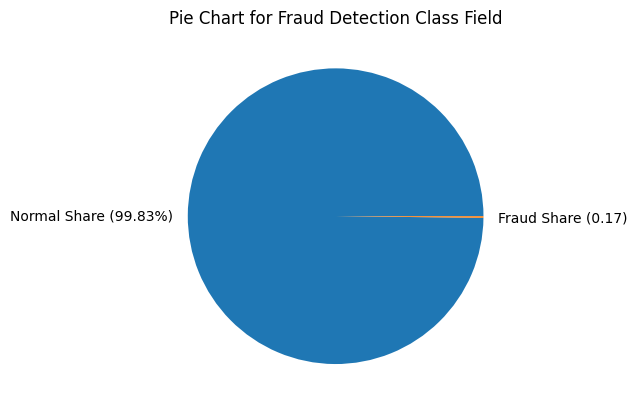

In [7]:
import matplotlib.pyplot as plt
# Data is purely unbalanced
plt.title('Pie Chart for Fraud Detection Class Field')
plt.pie([normal_share,fraud_share],labels=[f'Normal Share ({round(normal_share,2)}%)',f'Fraud Share ({round(fraud_share,2)})']) 

In [8]:
#Creating a df for percentage of each class
class_share = {'Class':['fraudulent','non_fraudulent'],'Percentage':[fraud_share,normal_share]}
class_share = pd.DataFrame(class_share)
class_share.head()

,Class,Percentage
0,fraudulent,0.172749
1,non_fraudulent,99.827251


c:\Users\jhaab\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


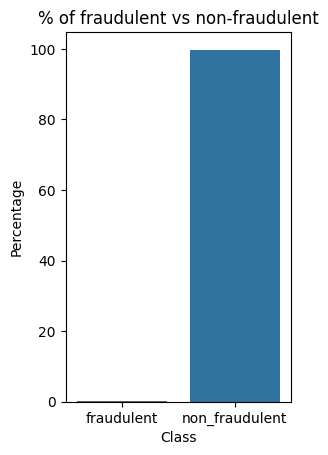

In [9]:
# Create a bar plot for the percentage of fraudulent vs non-fraudulent transcations
import seaborn as sns

plt.subplot(122)
sns.barplot(x='Class', y='Percentage',data=class_share)
plt.title('% of fraudulent vs non-fraudulent')
plt.show()

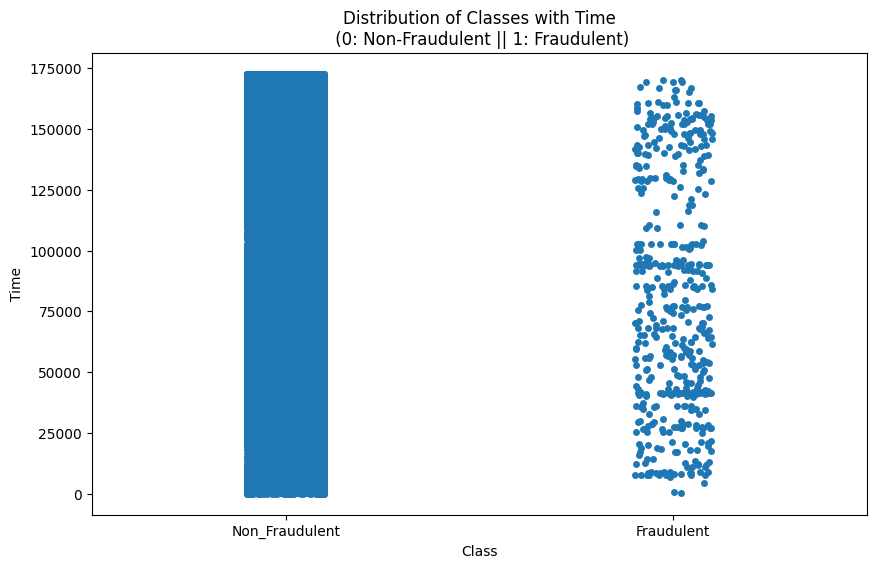

In [10]:
# Create a scatter plot to observe the distribution of classes with time
#sns.set_palette("muted")
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Time',data=df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

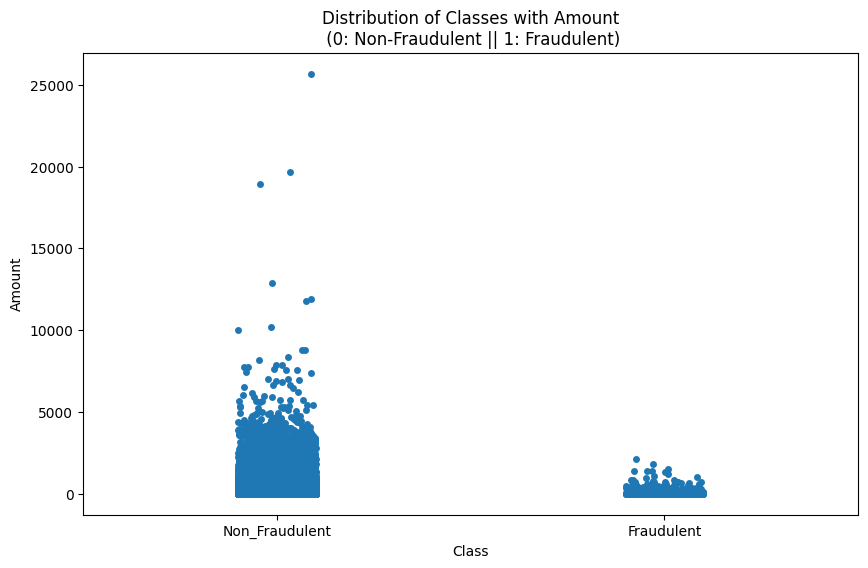

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

In [12]:
# Drop unnecessary columns
# Dropping the column 'Time' since it does not have any impact on deciding a fraud transaction

df=df.drop('Time',axis=1)
df.shape

(284807, 30)

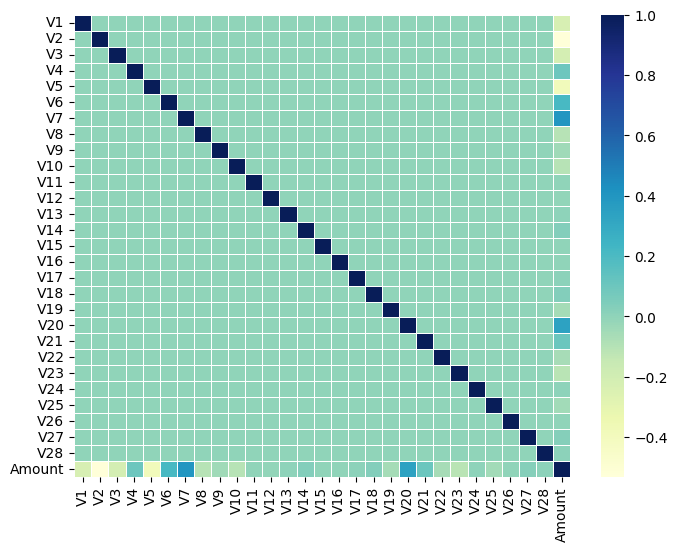

In [13]:
#Plotting heatmap to check the coorelation

plt.figure(figsize=(8,6))

sns.heatmap(df.corr(),linewidths=0.5,cmap='YlGnBu')

plt.show()

In [14]:
y= df.iloc[:,-1] #class variable
X = df.iloc[:,:-1]

In [15]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

#Using stratify=y so that proportion of each class is same in both train and test set

In [16]:
print('Total count for each class:\n', y.value_counts())
print("\nCount of each class in train data:\n",y_train.value_counts())
print("\nCount of each class in test data:\n",y_test.value_counts())

Total count for each class:
 Non_Fraudulent    284315
Fraudulent           492
Name: Class, dtype: int64

Count of each class in train data:
 Non_Fraudulent    227451
Fraudulent           394
Name: Class, dtype: int64

Count of each class in test data:
 Non_Fraudulent    56864
Fraudulent           98
Name: Class, dtype: int64


Model Performance Parameter

In [17]:
# Function to plot ROC curve and classification score which will be used for each model

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

def plot_roc(fpr,tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

def clf_score(clf):
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)    
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test,prob, pos_label='Non_Fraudulent')
    plot_roc(fpr,tpr)
    predicted=clf.predict(X_test)
    report = classification_report(y_test, predicted)
    print(report)
    return auc

Logistic Regression

In [19]:
# Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.model_selection import GridSearchCV

In [20]:
num_C = [0.001,0.01,0.1,1,10,100] #--> list of values

for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_train, y_train)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('')

c:\Users\jhaab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 0.001
Coefficient of each feature: [[-3.66326743e-03 -2.61553947e-02  8.69915718e-02 -2.45009482e-01
  -8.65242804e-02  4.37092391e-02  2.81022337e-02  1.03450183e-01
   7.96991724e-02  1.88319735e-01 -1.43494404e-01  1.91798132e-01
   5.45972289e-02  3.84569864e-01  4.99585032e-03  8.34954009e-02
   9.73475373e-02  9.62959643e-03 -1.50382367e-02  1.39882622e-02
  -2.60091597e-02 -2.61020239e-02  1.06387261e-02  1.00747788e-02
   7.21941405e-03 -1.21977168e-02 -6.42499953e-03  5.86883235e-03
  -2.29711945e-04]]
Training accuracy: 0.9990739318396278
Test accuracy: 0.9989817773252344



c:\Users\jhaab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 0.01
Coefficient of each feature: [[ 0.0651074  -0.01390256 -0.07315434 -0.33838681 -0.02119861  0.00099514
  -0.18105028  0.16239251  0.20625985  0.52291384 -0.1252429   0.17133602
   0.24170385  0.48789435  0.05683168  0.22016466  0.11108265 -0.06409995
   0.05136302 -0.61506781 -0.44041129 -0.02703744  0.14795244  0.01533127
   0.09363987 -0.01464875  0.0998892   0.06150661  0.00198065]]
Training accuracy: 0.9991968224011938
Test accuracy: 0.9991046662687406



c:\Users\jhaab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 0.1
Coefficient of each feature: [[-0.03810616  0.13020432 -0.06047116 -0.45753482  0.18929031 -0.09992709
  -0.3155471   0.23166747  0.32387852  0.67259436 -0.07103404  0.13759695
   0.34075401  0.53053428  0.15035233  0.3984816   0.08247907 -0.14280259
   0.11867759 -1.05179207 -0.61081384 -0.17966394  0.3749323   0.00763021
   0.13158303  0.00986732  0.14419866  0.05731465  0.00411857]]
Training accuracy: 0.9992846013737409
Test accuracy: 0.9992099996488887



c:\Users\jhaab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 1
Coefficient of each feature: [[-0.15652604  0.21358201  0.04657095 -0.76723163  0.30224403 -0.1253153
  -0.41308772  0.11324714  0.18076542  0.68555431 -0.06688259  0.04971628
   0.31354171  0.49459238  0.15674885  0.26849674  0.07345658 -0.07967472
   0.10904203 -1.17805449 -0.68729775 -0.11418112  0.49439428  0.00621347
   0.23112129  0.00772227  0.20853756  0.05336484  0.00514047]]
Training accuracy: 0.9992451008360947
Test accuracy: 0.9991573329588147



c:\Users\jhaab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 10
Coefficient of each feature: [[-0.1125425   0.32667677  0.04152781 -0.52570458  0.34656321 -0.1740001
  -0.37116097  0.12882959  0.36733341  0.68886187 -0.02607726  0.11712786
   0.32020501  0.54177087  0.20673545  0.37479646  0.00909863 -0.18066343
   0.15740721 -1.26556787 -0.64062051 -0.18486477  0.45970908  0.01565789
   0.17416853  0.00237263  0.17703369  0.03227729  0.00573315]]
Training accuracy: 0.9992099892470758
Test accuracy: 0.9990695551420246



c:\Users\jhaab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 100
Coefficient of each feature: [[-0.12698241  0.23616114 -0.02230603 -0.53125931  0.29205847 -0.16658452
  -0.21545024  0.21988754  0.28693504  0.50596634 -0.047666    0.10508424
   0.32058316  0.58205977  0.18963693  0.34959226  0.05173381 -0.1195941
   0.11229199 -1.04674244 -0.61491635 -0.1823276   0.49990568 -0.0040611
   0.19727361 -0.00523009  0.15955061  0.04171701  0.00441152]]
Training accuracy: 0.9992582676819768
Test accuracy: 0.9991748885221726



The best C value is the one for which the difference between train and test score is the least.
In our case the best value of C=0.1

In [21]:
#perform cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

lsr = LogisticRegression()
clf_lsr_cv = GridSearchCV(lsr,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

#perform hyperparameter tuning



#print the optimum value of hyperparameters

c:\Users\jhaab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jhaab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.983213339212447


c:\Users\jhaab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters : {'C': 0.01, 'penalty': 'l2'}

c:\Users\jhaab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.96


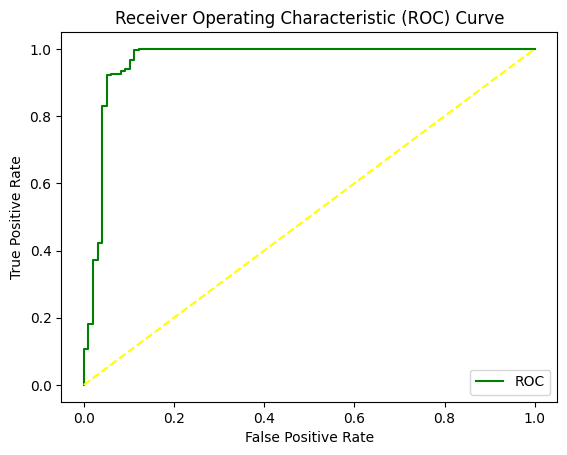

                precision    recall  f1-score   support

    Fraudulent       0.86      0.57      0.69        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.93      0.79      0.84     56962
  weighted avg       1.00      1.00      1.00     56962



0.9644071999931094

In [22]:
# Fitting the model with best parameters .

lsr_best = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
lsr_clf = lsr_best.fit(X_train,y_train)
clf_score(lsr_clf)

AUC Score is 0.964 for logitic regression

KNN

In [23]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

# Taking only odd integers as K values to apply the majority rule. 
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
k_range


array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [24]:
# Finding the best k with stratified K-fold method. 
# We will use cv=3 in cross_val_score to specify the number of folds in the (Stratified)KFold.

for k in k_range:
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,y_train)
  score = cross_val_score(knn_clf, X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]


In [ ]:
#Plotting a line plot to decide optimum value of K

plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(k_range,mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(k_range,scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

In [ ]:
#Fitting the best parameter to the model
# 3 fold cross validation with K=3

knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

# Checking AUC 
clf_score(knn_clf)

Random Forest Classifier

In [ ]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)


We will use these parameters for Random forest {'max_depth': 9, 'n_estimators': 30}. The Accuracy is 0.97 which is very good.

AUC: 0.97


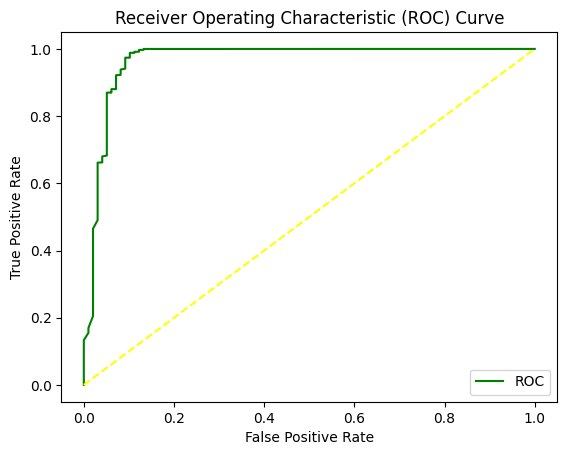

                precision    recall  f1-score   support

    Fraudulent       0.97      0.74      0.84        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.99      0.87      0.92     56962
  weighted avg       1.00      1.00      1.00     56962



0.9664594471018569

In [19]:
#Fitting model and plotting ROC
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_clf = rf.fit(X_train,y_train)

#Plotting ROC
clf_score(RFC_clf)

In [22]:
import pickle as pkl

file = open('model.pkl','wb')
pkl.dump({'model':rf},file)

print('Model created to pickle file Successfully !!!')

Model created to pickle file Successfully !!!


In [33]:
print(np.array(X)[0])

[-1.35980713e+00 -7.27811733e-02  2.53634674e+00  1.37815522e+00
 -3.38320770e-01  4.62387778e-01  2.39598554e-01  9.86979013e-02
  3.63786970e-01  9.07941720e-02 -5.51599533e-01 -6.17800856e-01
 -9.91389847e-01 -3.11169354e-01  1.46817697e+00 -4.70400525e-01
  2.07971242e-01  2.57905802e-02  4.03992960e-01  2.51412098e-01
 -1.83067779e-02  2.77837576e-01 -1.10473910e-01  6.69280749e-02
  1.28539358e-01 -1.89114844e-01  1.33558377e-01 -2.10530535e-02
  1.49620000e+02]
